# Google Playstore Reviews

https://www.kaggle.com/lava18/google-play-store-apps

Selected Outcome Variable: Rating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

% matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
print(df.head())

                                                 app        category  rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  reviews  size     installs  type price content_rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      genres      last_updated         current_ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [3]:
df.category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: category, dtype: int64

In [4]:
# Most price points seem fairly low
print(df.price.value_counts().head(10))
print(df.price.unique())

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
$3.99       63
$1.49       46
$5.99       30
$2.49       26
$9.99       21
Name: price, dtype: int64
['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [5]:
# Correct cell 10472, values clearly transposed one columns over
df.iloc[10472]
for i in reversed(range(2, len(df.columns)-1)):
               df.iloc[10472, i] = df.iloc[10472, i-1]

df.iloc[10472, 1] = 'NaN'
print(df.iloc[10472])

app               Life Made WI-Fi Touchscreen Photo Frame
category                                              NaN
rating                                                1.9
reviews                                                19
size                                                 3.0M
installs                                           1,000+
type                                                 Free
price                                                   0
content_rating                                   Everyone
genres                                                NaN
last_updated                            February 11, 2018
current_ver                                        1.0.19
android_ver                                           NaN
Name: 10472, dtype: object


In [6]:
df['size'].value_counts().head(10)

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
Name: size, dtype: int64

In [7]:
print(df.installs.unique())
# Looking at the categories of apps with a high number of installs
print(df.loc[df.installs=='1,000,000,000+'].category.value_counts())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']
COMMUNICATION          19
SOCIAL                  8
GAME                    6
TRAVEL_AND_LOCAL        5
PHOTOGRAPHY             4
NEWS_AND_MAGAZINES      4
PRODUCTIVITY            4
VIDEO_PLAYERS           3
TOOLS                   2
ENTERTAINMENT           1
BOOKS_AND_REFERENCE     1
FAMILY                  1
Name: category, dtype: int64


## Select 4-5 Variables
1. Category (categorical)
2. Reviews
3. Size
4. Price
5. Installs


In [8]:
# Create an installs variable that is numeric
df['installs_num'] = df.installs.str.replace(',', '')
df['installs_num'] = df.installs_num.str.replace('+', '')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null object
reviews           10841 non-null object
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10841 non-null object
genres            10840 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
installs_num      10841 non-null object
dtypes: object(14)
memory usage: 1.2+ MB
None


In [9]:
# Convert data type of the following columns to numeric
df['reviews'] = pd.to_numeric(df['reviews'])
df['installs_num'] = pd.to_numeric(df['installs_num'])
df['rating'] = pd.to_numeric(df['rating'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null float64
reviews           10841 non-null float64
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10841 non-null object
genres            10840 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
installs_num      10841 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [10]:
# Convert the size of the application to a numeric value
def value_to_float(x):
    # k stands for kilo, *1000
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    # M stands for mega, *1000000
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
    else:
        try:
            return float(x)
        except:
            return float('NaN')

df['size_num'] = df['size'].apply(value_to_float)

df['size_num'] = pd.to_numeric(df['size_num'])

df.size_num.head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: size_num, dtype: float64

In [11]:
# Remove the $ sign in the price column and convert it to numeric
df['price_num'] = pd.to_numeric(df['price'].str.replace('$', ''))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null float64
reviews           10841 non-null float64
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10841 non-null object
genres            10840 non-null object
last_updated      10841 non-null object
current_ver       10833 non-null object
android_ver       10838 non-null object
installs_num      10841 non-null int64
size_num          9146 non-null float64
price_num         10841 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


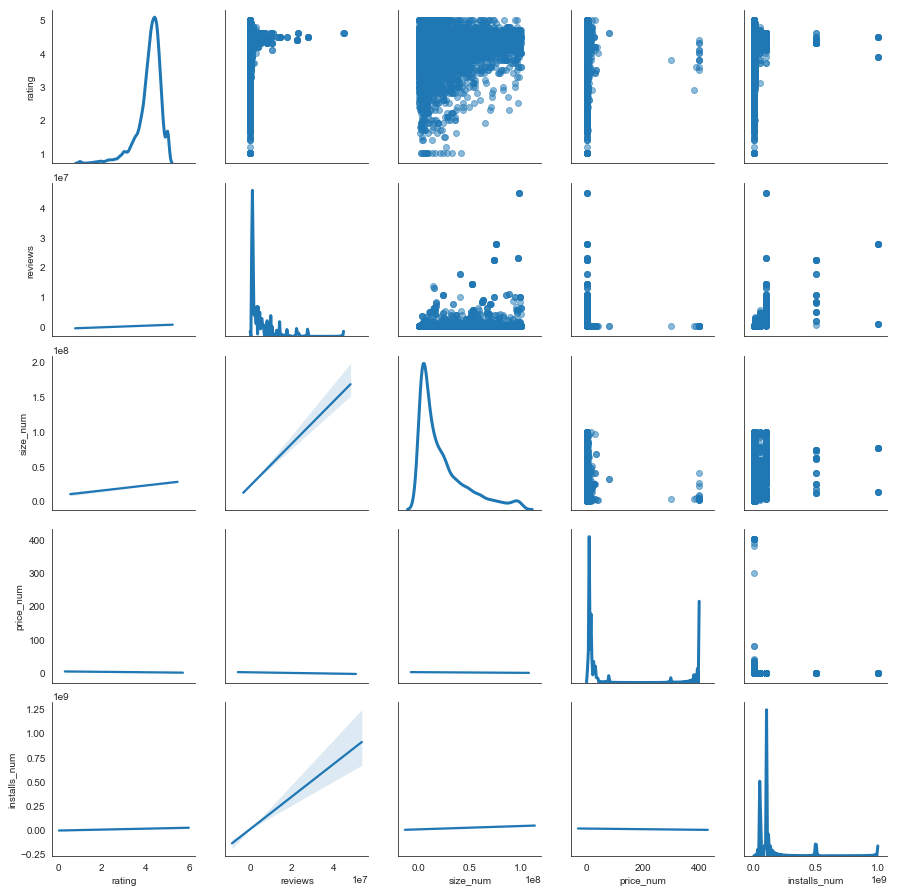

In [12]:
# Create a data frame with these numeric values
df_numeric = df[['rating', 'reviews', 'size_num', 'price_num', 'installs_num']]

sns.set_style('white')

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_numeric.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()


                rating   reviews  size_num  price_num  installs_num
rating        1.000000  0.068147  0.084096  -0.021851      0.051393
reviews       0.068147  1.000000  0.238219  -0.009666      0.643123
size_num      0.084096  0.238219  1.000000  -0.022999      0.164795
price_num    -0.021851 -0.009666 -0.022999   1.000000     -0.011688
installs_num  0.051393  0.643123  0.164795  -0.011688      1.000000


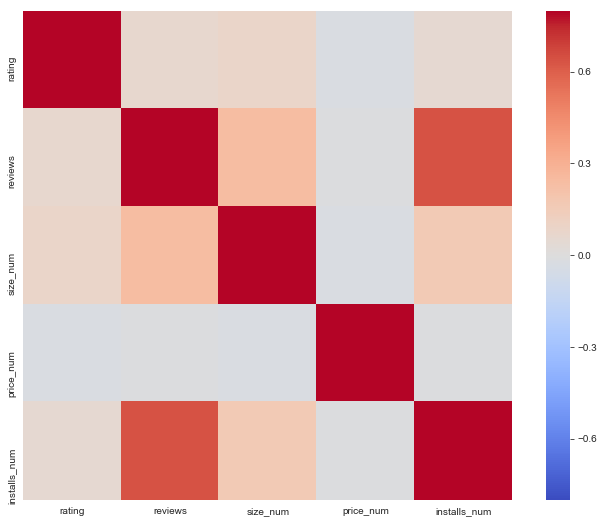

In [13]:
# Make a correlation matrix
corrmat = df_numeric.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, vmin=-.8, square=True, cmap='coolwarm')
plt.show()

### Looks like number of reviews and number of installs are correlated

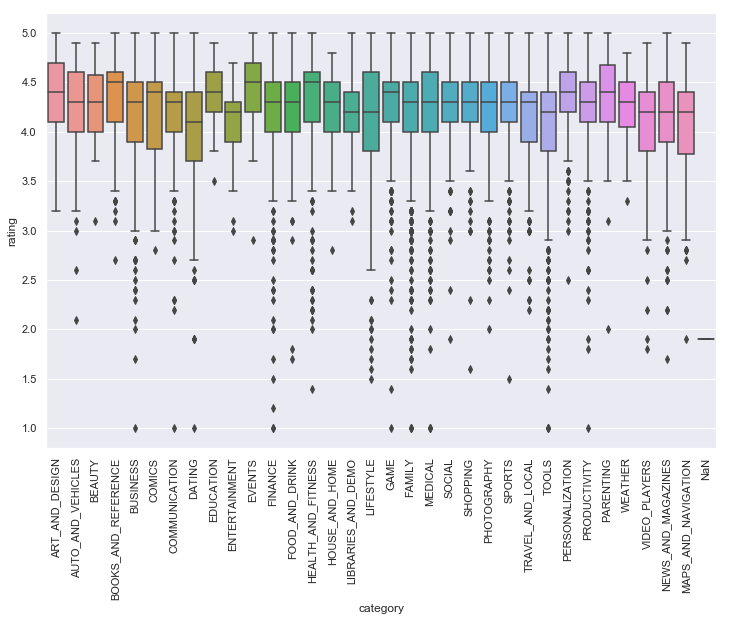

In [34]:
# Plot all the variables with boxplots

# Melt the dataframe
variables = ['reviews', 'size_num', 'price_num', 'installs_num']


# Make the boxplots larger
sns.set(rc={'figure.figsize':(12,8)})

# Plot category vs. rating 
sns.boxplot(data=df, x='category', y='rating')
plt.xticks(rotation=90)
plt.show()

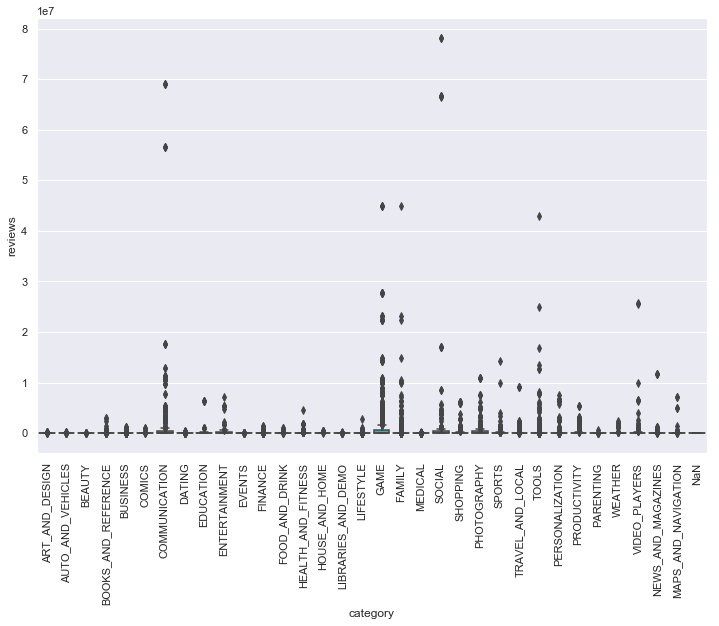

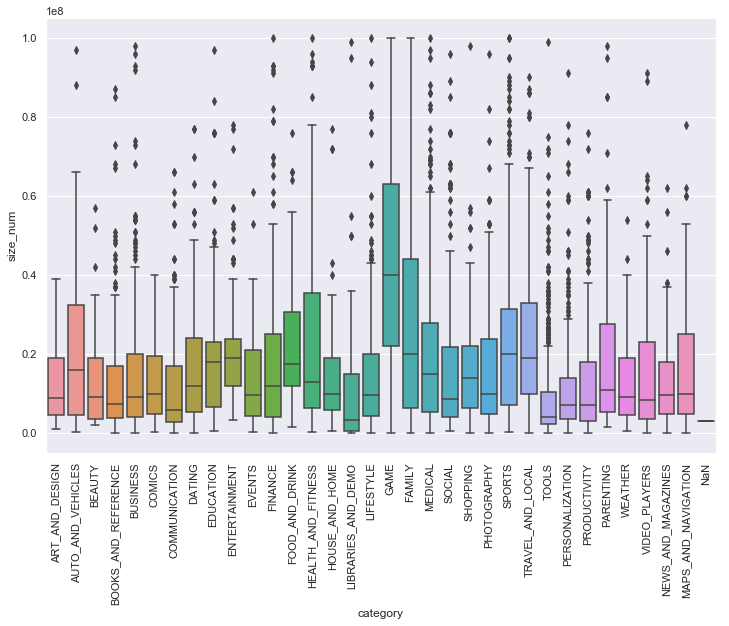

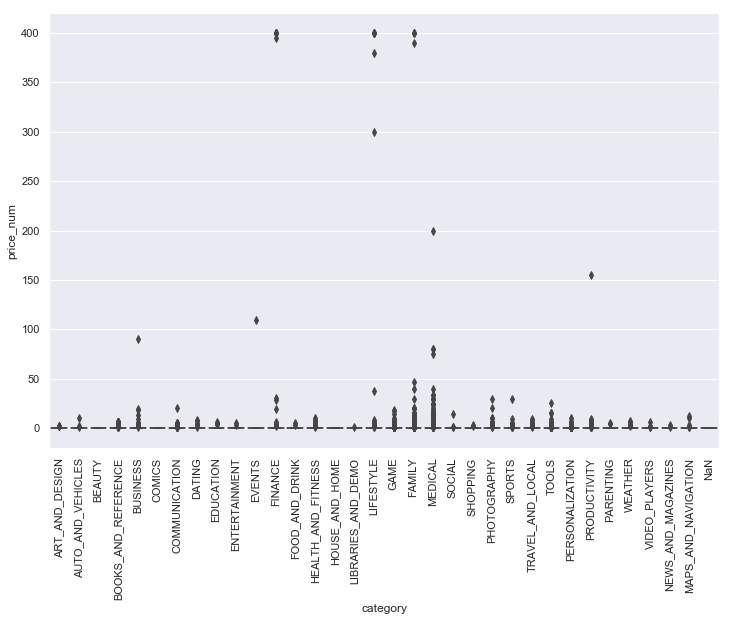

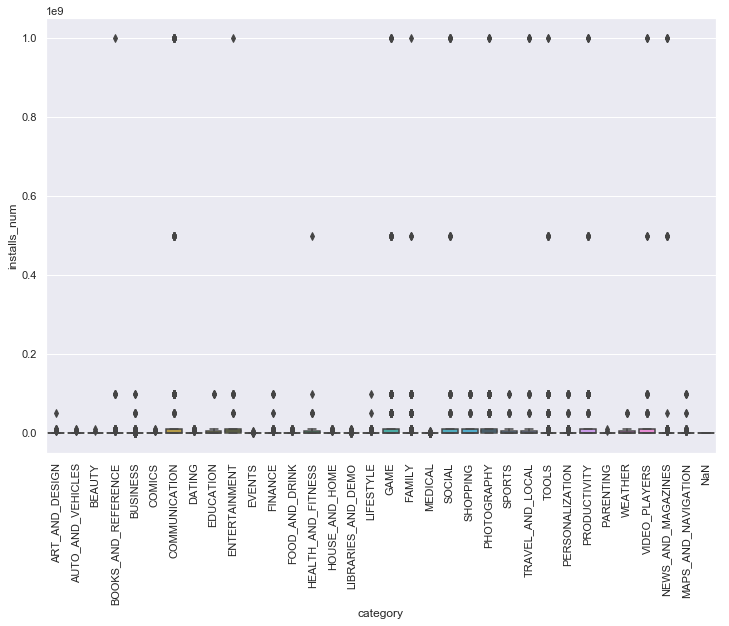

In [35]:
for variable in variables:
    # the size of A4 paper
    sns.set(rc={'figure.figsize':(12,8)})

    sns.boxplot(data=df, x='category', y=variable)
    plt.xticks(rotation=90)
    plt.show()

In [16]:
# Investigating the outlier price points

df[df['price_num'] > 300].head()
# It appears as though this is a sarcastic app? This may skew results.

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,installs_num,size_num,price_num
4197,most expensive app (H),FAMILY,4.3,6.0,1.5M,100+,Paid,$399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,100,1500000.0,399.99
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,10000,26000000.0,399.99
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000,7300000.0,400.00
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,100000,1800000.0,399.99
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,10000,8700000.0,399.99


In [17]:
# Making some dummy variables
features = pd.get_dummies(df['category'])
features.head()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Create a categorical variable from the prices
features['expensive'] = np.where(df['price_num'] > 100, 1, 0)
features['inexpensive'] = np.where(df['price_num'] < 1, 1, 0)

# Check that it worked
print(df['price_num'].groupby(features['expensive']).describe())
print(df['price_num'].groupby(features['inexpensive']).describe())

             count        mean        std     min     25%     50%     75%  \
expensive                                                                   
0          10821.0    0.370285   2.521709    0.00    0.00    0.00    0.00   
1             20.0  356.491000  90.844790  109.99  387.49  399.99  399.99   

              max  
expensive          
0           89.99  
1          400.00  
               count       mean        std  min   25%   50%   75%     max
inexpensive                                                              
0              652.0  16.856058  62.995038  1.0  2.49  3.99  5.99  400.00
1            10189.0   0.014380   0.118453  0.0  0.00  0.00  0.00    0.99


                       reviews  installs_num  num_reviews_installs
reviews               1.000000      0.643123              0.923384
installs_num          0.643123      1.000000              0.887809
num_reviews_installs  0.923384      0.887809              1.000000


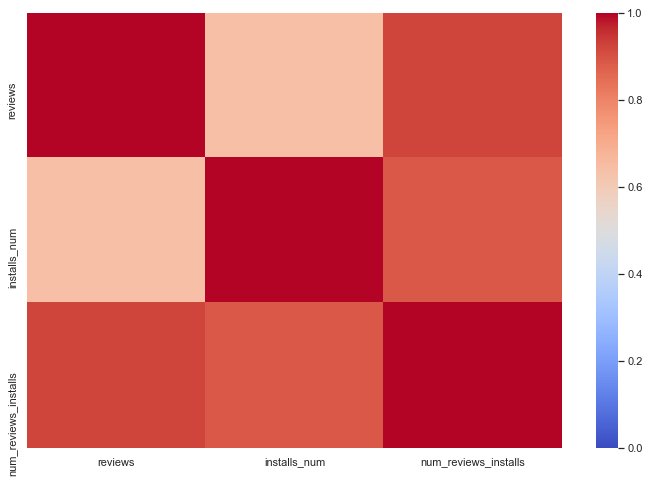

In [36]:
# installs_num and reviews are highly correlated and somewhat redundant.  
# Try combining them

means = df[['reviews', 'installs_num']].mean(axis=0)
stds = df[['reviews', 'installs_num']].mean(axis=0)

features['num_reviews_installs'] = ((df[['reviews', 'installs_num']] - means) / stds).mean(axis=1)

# Check and see how the composite correlates with the individual variables
plotdf = df.loc[:, ['reviews', 'installs_num']]
plotdf['num_reviews_installs'] = features['num_reviews_installs']
corrmat2 = plotdf.corr()

print(corrmat2)

sns.heatmap(corrmat2, vmax=1, vmin=0, cmap='coolwarm')

In [20]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 37 columns):
ART_AND_DESIGN          10841 non-null uint8
AUTO_AND_VEHICLES       10841 non-null uint8
BEAUTY                  10841 non-null uint8
BOOKS_AND_REFERENCE     10841 non-null uint8
BUSINESS                10841 non-null uint8
COMICS                  10841 non-null uint8
COMMUNICATION           10841 non-null uint8
DATING                  10841 non-null uint8
EDUCATION               10841 non-null uint8
ENTERTAINMENT           10841 non-null uint8
EVENTS                  10841 non-null uint8
FAMILY                  10841 non-null uint8
FINANCE                 10841 non-null uint8
FOOD_AND_DRINK          10841 non-null uint8
GAME                    10841 non-null uint8
HEALTH_AND_FITNESS      10841 non-null uint8
HOUSE_AND_HOME          10841 non-null uint8
LIBRARIES_AND_DEMO      10841 non-null uint8
LIFESTYLE               10841 non-null uint8
MAPS_AND_NAVIGATION     10841 non-nu

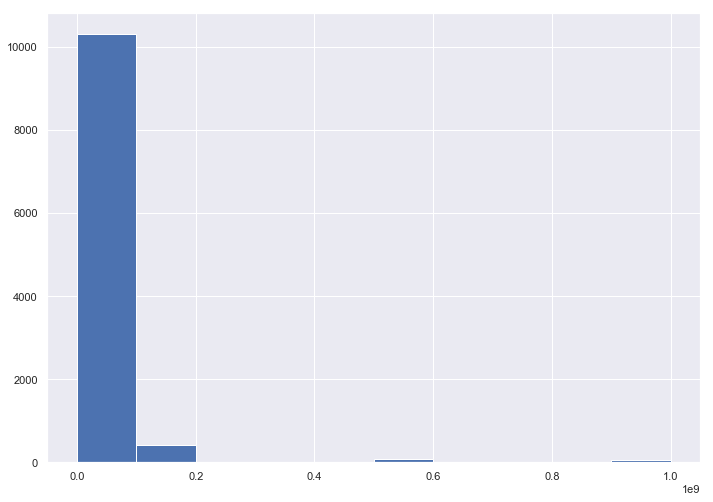

In [21]:
# The number of installs is not normally distributed
plt.hist(df['installs_num'])
plt.show()

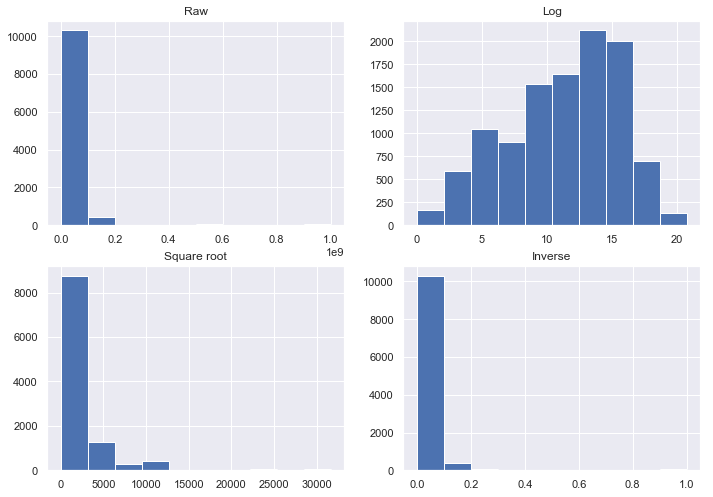

In [22]:
# Create a function to avoid taking log of 0
def log_array(x):
    if x <= 0:
        return 0
    else :
        return np.log(x)
    
# Create a function to avoid inverse of 0
def inv_array(x):
    if x <= 0:
        return 0
    else:
        return 1/x

fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['installs_num'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(df['installs_num'].dropna().apply(log_array))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['installs_num'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(df['installs_num'].dropna().apply(inv_array))
plt.title('Inverse')
plt.show()

# As expected from the form of the data, the log one looks more informative, but still
# not normal
features['log_installs_num'] = df['installs_num'].apply(log_array)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


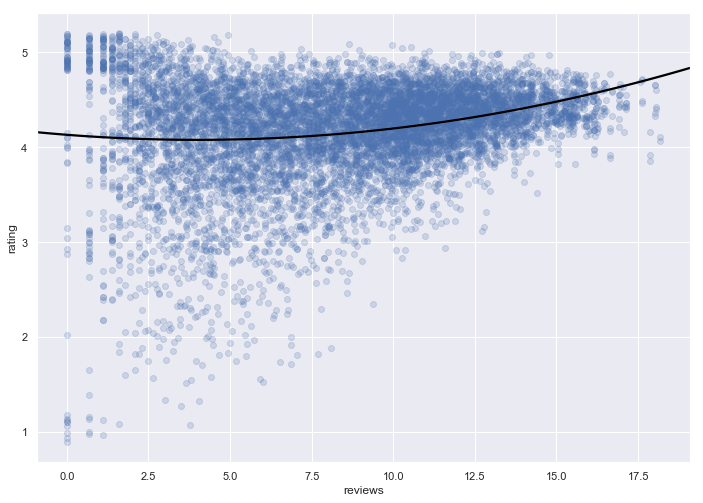

In [23]:
sns.regplot(
    x=df['reviews'].apply(log_array),
    y=df['rating'],
    y_jitter=.2,
    order=2,
    scatter_kws={'alpha':0.2},
    line_kws={'color':'black'},
    ci=.05
)
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


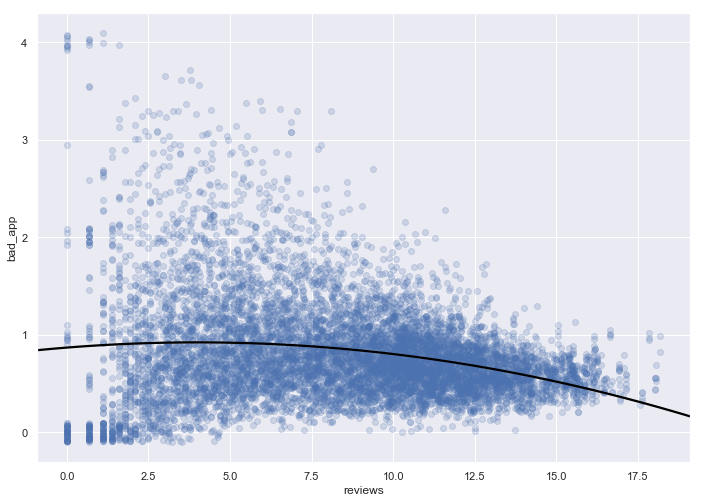

In [24]:
# Reverse code the review rating so that a higher score means a bad app
features['bad_app'] = max(df['rating']) - df['rating']

sns.regplot(
    x=df['reviews'].apply(log_array),
    y=features['bad_app'],
    y_jitter=.1,
    order=2,
    scatter_kws={'alpha':0.2},
    line_kws={'color':'black'},
    ci=.05
)
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


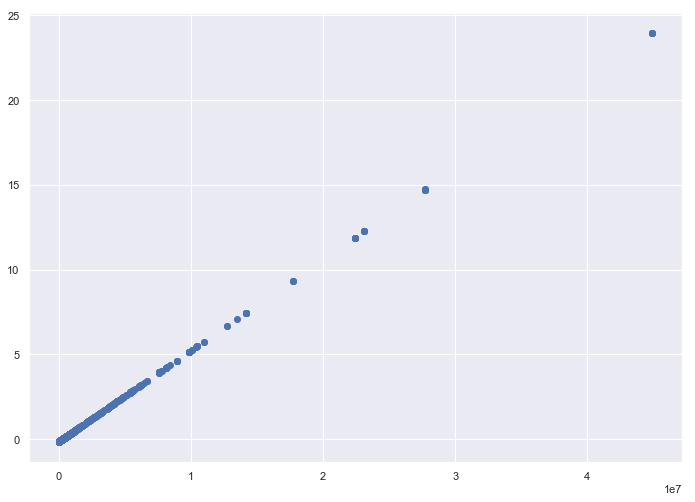

             rating      reviews  installs_num      size_num     price_num
count  7.730000e+03  7730.000000  7.730000e+03  7.730000e+03  7.730000e+03
mean   4.118023e-16     0.000000 -2.206084e-17  7.353612e-17 -2.573764e-17
std    1.000065e+00     1.000065  1.000065e+00  1.000065e+00  1.000065e+00
min   -5.821911e+00    -0.158151 -1.678894e-01 -9.787988e-01 -6.480057e-02
25%   -3.183924e-01    -0.158094 -1.676900e-01 -7.530865e-01 -6.480057e-02
50%    2.319594e-01    -0.156904 -1.658947e-01 -3.819824e-01 -6.480057e-02
75%    5.988606e-01    -0.137239 -1.479421e-01  4.284749e-01 -6.480057e-02
max    1.516114e+00    23.939622  1.977942e+01  3.286403e+00  2.292496e+01


In [25]:
# Change features to have the same range
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save column names
names = df_num.columns

# Scale, then turn the resulting numpy array back into a data frame
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

plt.scatter(df_num['reviews'], df_scaled['reviews'])
plt.show()

print(df_scaled.describe())

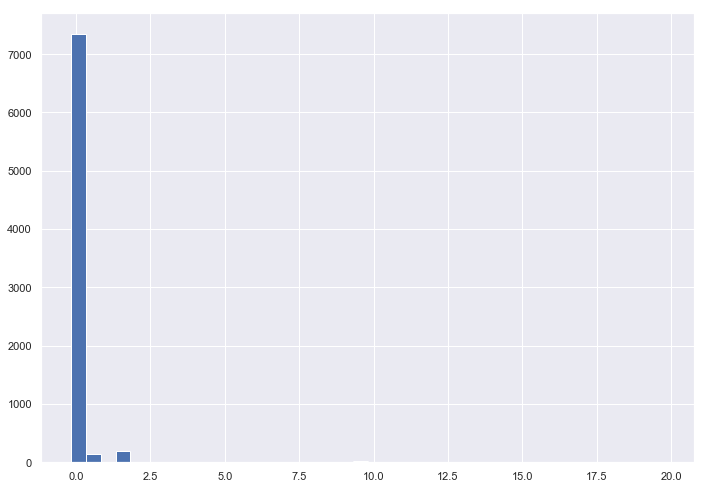

In [26]:
df_scaled['installs_num'].hist(bins=40)

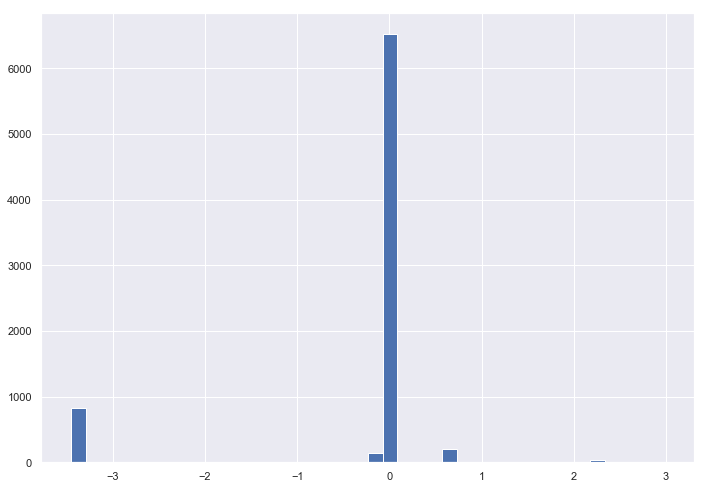

In [27]:
df_scaled['installs_num_log'] = df_scaled['installs_num'].apply(log_array)
df_scaled['installs_num_log'].hist(bins=40)

Taking the log of the scaled installs variable didn't do much.  Wouldn't recommend using it.

##  PCA

Covariance Matrix:
 [[ 1.00009225  0.64318228 -0.00966724]
 [ 0.64318228  1.00009225 -0.01168945]
 [-0.00966724 -0.01168945  1.00009225]]


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


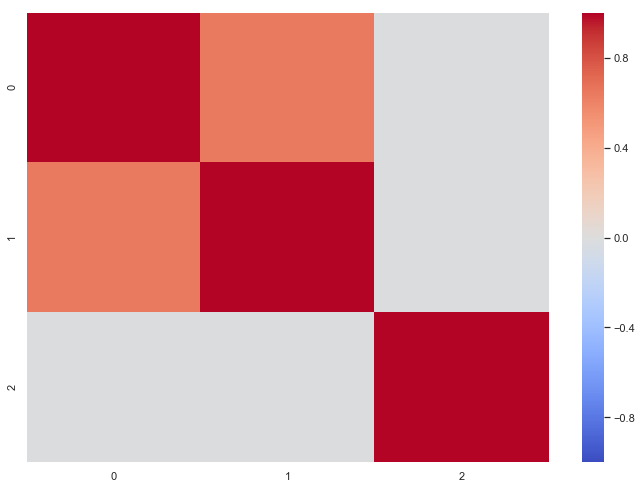

In [28]:
df_pca = df.loc[:, ['reviews', 'installs_num', 'price_num']].dropna()

X = StandardScaler().fit_transform(df_pca)

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

sns.heatmap(Cx, vmax=1, vmin=-1, cmap='coolwarm')

In [29]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.70689373]
 [ 0.7069306 ]
 [-0.02345996]]
Eigenvalue 1: 1.6436289063265317
----------------------------------------
Eigenvector 2: 
[[ 0.70708657]
 [-0.70712349]
 [-0.00222378]]
Eigenvalue 2: 0.3569067928253443
----------------------------------------
Eigenvector 3: 
[[0.01816115]
 [0.01501624]
 [0.9997223 ]]
Eigenvalue 3: 0.9997410536156546
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.54782576 0.11895796 0.33321628]


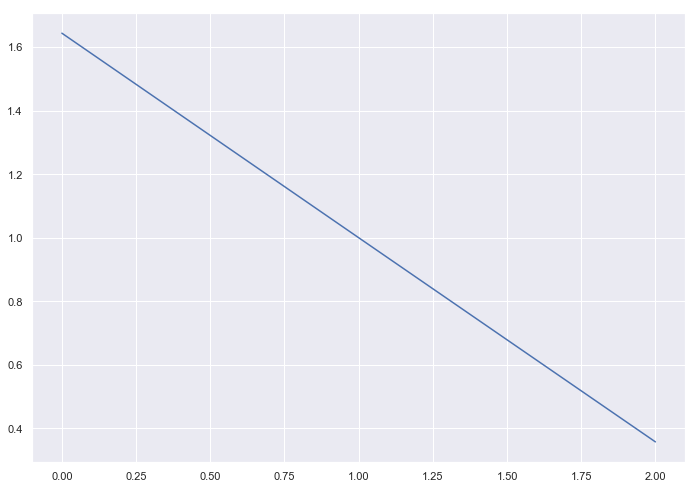

In [30]:
plt.plot(sorted(eig_val_cov, reverse=True))
plt.show()

In [31]:
print(sorted(eig_val_cov, reverse=True))

[1.6436289063265317, 0.9997410536156546, 0.3569067928253443]


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.54782576 0.33321628 0.11895796]


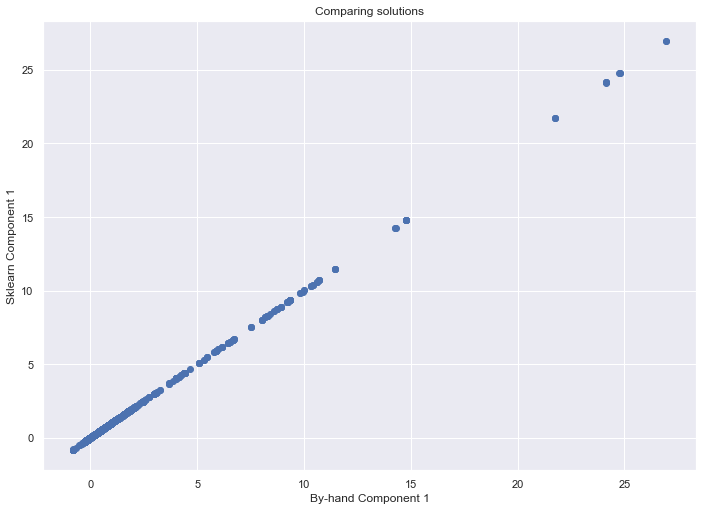

In [32]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

P = eig_vec_cov[:, 0]
# Transform X into Y.
Y = P.T.dot(Xt)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

### Feature Selection

In [39]:
print(features.head())
print(df_scaled.head())


   ART_AND_DESIGN  AUTO_AND_VEHICLES  BEAUTY  BOOKS_AND_REFERENCE  BUSINESS  \
0               1                  0       0                    0         0   
1               1                  0       0                    0         0   
2               1                  0       0                    0         0   
3               1                  0       0                    0         0   
4               1                  0       0                    0         0   

   COMICS  COMMUNICATION  DATING  EDUCATION  ENTERTAINMENT   ...     SPORTS  \
0       0              0       0          0              0   ...          0   
1       0              0       0          0              0   ...          0   
2       0              0       0          0              0   ...          0   
3       0              0       0          0              0   ...          0   
4       0              0       0          0              0   ...          0   

   TOOLS  TRAVEL_AND_LOCAL  VIDEO_PLAYERS  WEATHER